### Load libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
%matplotlib inline 

### Load data

In [15]:
DATA_FOLDER = '~/Active/Vesta Fraud Detection/Data/'

sample_submission    = pd.read_csv(os.path.join(DATA_FOLDER, 'sample_submission.csv'))
test_identity        = pd.read_csv(os.path.join(DATA_FOLDER, 'test_identity.csv'))
test_transaction     = pd.read_csv(os.path.join(DATA_FOLDER, 'test_transaction.csv'))
train_identity       = pd.read_csv(os.path.join(DATA_FOLDER, 'train_identity.csv'))
train_transaction    = pd.read_csv(os.path.join(DATA_FOLDER, 'train_transaction.csv'))

### EDA

#### Train data

##### Identity

In [144]:
print("____ TRAIN IDENTITY ____")
print(train_identity.info())

#print(train_identity.dtypes)


____ TRAIN IDENTITY ____
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5

In [146]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [156]:
#train_identity[["id_09","id_10","id_11","id_12","id_13","id_14","id_15","id_16","id_17"]].describe()
train_identity.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


##### Transactions

In [147]:
print("____ TRANSACTIONS ____")
print(train_transaction.info())

____ TRANSACTIONS ____
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB
None


In [149]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
train_transaction.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [18]:
#check for missing values info
print("____ TRAIN IDENTITY ____")
print(train_identity.isnull().sum())

print("____ TRANSACTIONS ____")
print(train_transaction.isnull().sum())

____ TRAIN IDENTITY ____
TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo     

In [60]:
#Missing values by row
print("____ TRAIN IDENTITY ____")
print(train_identity.isnull().sum(axis = 1).head(25))

print("____ TRANSACTIONS ____")
print(train_transaction.isnull().sum(axis = 1).head(25))

____ TRAIN IDENTITY ____
0     17
1     14
2     15
3     20
4     10
5      9
6     37
7     11
8     15
9     19
10    19
11    17
12    10
13    11
14    14
15    19
16    19
17    19
18    13
19     0
20    15
21    11
22    11
23    19
24    37
dtype: int64
____ TRANSACTIONS ____
0     194
1     190
2     171
3     187
4     120
5     174
6     171
7     190
8     120
9     171
10     71
11     76
12    187
13    189
14    190
15    193
16    118
17    118
18    173
19    187
20    171
21    189
22    170
23    176
24    189
dtype: int64


In [74]:
train_tr_cat = ["ProductCD","card1","card2","card3","card4","card5","card6", "addr1", "addr2","P_emaildomain","R_emaildomain",
    "M1","M2","M3","M4","M5","M6","M7","M8","M9"]
print(train_tr_cat)
print("Categorical features transcation data = ", len(train_tr_cat))

train_id_cat = ["DeviceType","DeviceInfo"]
for i in range(12,39):
    x = "id_" + str(i)
    #print(x)
    train_id_cat.append(x)
print(train_id_cat)

print("Categorical features identity data = ", len(train_id_cat))

['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
Categorical features transcation data =  20
['DeviceType', 'DeviceInfo', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']
Categorical features identity data =  29


#### Test data

In [ ]:
print(test_identity.head())
print(test_identity.dtypes)
print(test_identity.describe())

print(test_transaction.head()) #added again the line here
print(test_transaction.dtypes)
print(test_transaction.describe())

Event ratio is =  0.035
0    569877
1     20663
Name: isFraud, dtype: int64


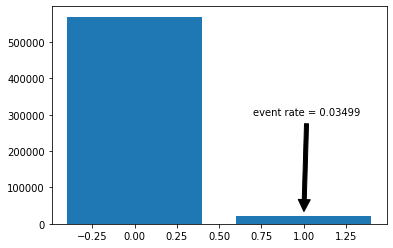

In [39]:
label_bar = train_transaction['isFraud'].value_counts()
event = train_transaction['isFraud'].value_counts()[1]
total = train_transaction['isFraud'].value_counts().sum()
print("Event ratio is = ",round(event/ total,4))
print(label_bar)
plt.bar(label_bar.index, label_bar.values)
plt.annotate("event rate = " + str(round(event/ total,5)), xy=(1, 20000), xytext=(0.7, 300000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.show()
#delete previously added line here

#### Explore categorial features per documentation

In [46]:
for cat in train_tr_cat:
    print(cat)
    print(train_transaction[cat].value_counts())

ProductCD
W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64
card1
7919     14932
9500     14162
15885    10361
17188    10344
15066     7945
12695     7091
12544     6773
6019      6771
2803      6141
7585      5334
10616     5172
12839     5129
3154      4614
2616      4410
18132     4209
9633      4158
15497     3977
16132     3929
2884      3873
16075     3748
11207     3693
10112     3560
7508      3490
10057     3166
12501     3152
7826      3006
16659     2988
12577     2891
5812      2818
7664      2792
         ...  
15229        1
7772         1
12456        1
16550        1
5218         1
3958         1
1911         1
7342         1
11944        1
8572         1
4369         1
15463        1
10621        1
11365        1
2937         1
9084         1
3169         1
3859         1
13182        1
17776        1
3449         1
5498         1
7547         1
4706         1
2657         1
12390        1
10341        1
10006        1
15743    

T    285468
F     33972
Name: M2, dtype: int64
M3
T    251731
F     67709
Name: M3, dtype: int64
M4
M0    196405
M2     59865
M1     52826
Name: M4, dtype: int64
M5
F    132491
T    107567
Name: M5, dtype: int64
M6
F    227856
T    193324
Name: M6, dtype: int64
M7
F    211374
T     32901
Name: M7, dtype: int64
M8
F    155251
T     89037
Name: M8, dtype: int64
M9
T    205656
F     38632
Name: M9, dtype: int64


In [51]:
for cat in train_id_cat:
    print(cat)
    print(train_identity[cat].value_counts().head(20))

DeviceType
desktop    85165
mobile     55645
Name: DeviceType, dtype: int64
DeviceInfo
Windows                        47722
iOS Device                     19782
MacOS                          12573
Trident/7.0                     7440
rv:11.0                         1901
rv:57.0                          962
SM-J700M Build/MMB29K            549
SM-G610M Build/MMB29K            461
SM-G531H Build/LMY48B            410
rv:59.0                          362
SM-G935F Build/NRD90M            334
SM-G955U Build/NRD90M            328
SM-G532M Build/MMB29T            316
ALE-L23 Build/HuaweiALE-L23      312
SM-G950U Build/NRD90M            290
SM-G930V Build/NRD90M            274
rv:58.0                          269
rv:52.0                          256
SAMSUNG                          235
SM-G950F Build/NRD90M            225
Name: DeviceInfo, dtype: int64
id_12
NotFound    123025
Found        21208
Name: id_12, dtype: int64
id_13
52.0    58099
49.0    26365
64.0    14429
33.0    10048
27.0     3

#### Merge data

In [52]:
print(train_transaction.columns)
print(train_identity.columns)

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)
Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')


In [61]:
all_data_train = train_transaction.merge(train_identity, how = "left", on = "TransactionID")
all_data_test = test_transaction.merge(test_identity, how = "left", on = "TransactionID")
print("shape train data = ",all_data_train.shape)
print("shape test data = ",all_data_test.shape)

shape train data =  (590540, 434)
shape test data =  (506691, 433)


There's only one features difference - most probably the label

Number of rows btw train and test are similar - either data is randomized and split OR split by time (somewhere in the middle?)

In [64]:
all_data_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [66]:
all_data_train.tail()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590539,3577539,0,15811131,279.95,W,15066,170.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
all_data_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For many transactions we do not have identity info

#### duplicate records

In [59]:
#check for duplicate records
print("Duplicate records all = ",all_data_train.duplicated().sum()) #-> no duplicates
#check for duplicate records with different lables
print("Duplicate records with diff lables = ", all_data_train.drop(['isFraud'], axis=1).duplicated().sum()) #-> no duplicates

Duplicate records all =  0
Duplicate records with diff lables =  0


#### Append train and test

In [67]:
traintest = pd.concat([all_data_train, all_data_test], axis = 0)
print(traintest.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(1097231, 434)


In [68]:
n_un = all_data_train.nunique(dropna = False)
print(n_un.sort_values()[:10])

isFraud       2
V88           3
V65           3
DeviceType    3
id_16         3
M1            3
id_12         3
M2            3
id_27         3
id_28         3
dtype: int64


We do not have constant features

#### Feature Relationships

In [77]:
#Correlation matrix
all_cat_fat = train_id_cat + train_tr_cat
print(all_cat_fat)
#all_data_train.drop(all_cat_fat, axis=1).corr()
corr_matrix_all = all_data_train.corr()
corr_matrix_all.to_csv("~/Active/Vesta Fraud Detection/Reports/corr matrix all.csv")

['DeviceType', 'DeviceInfo', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


In [134]:
type(corr_matrix_all)
corr_matrix_all.head()
corr_matrix_all.shape


#For each feature find all other featuer above certain correlation treshhold

def corr_threshold(df, abs_threshold):
    ls_all = []
    r = -1
    c = -1
    for row in df.index:
        r = r + 1
        ls_row = []
        for  col in df.columns:
            c = c + 1
            if (abs(df.loc[row, col])  >= abs_threshold) & (row != col) & (col not in df.index[0:r]):
                if len(ls_row) == 0: 
                    ls_row = [row]
        #        print(row)
        #        print(col)
        #        print(abs(corr_matrix_all.loc[row, col]))
                ls_row.append(col)
        #        print(ls_row)
        if len(ls_row) > 0:
            ls_all.append(ls_row)
    return ls_all
    #print(ls_all)

In [198]:
#Get list of lists of items above certain correlatoin threshold
threshold_95 = corr_threshold(corr_matrix_all,0.95)
threshold_99 = corr_threshold(corr_matrix_all,0.99) #exclude all but 1
threshold_100 = corr_threshold(corr_matrix_all,1) 
threshold_100

[]

In [139]:
#investigate further different subsets with high correlation
all_data_train[threshold_99[0]].head()

,TransactionID,TransactionDT
0,2987000,86400
1,2987001,86401
2,2987002,86469
3,2987003,86499
4,2987004,86506


In [143]:
all_data_train[threshold_99[1]].head(15)

,C1,C2,C11
0,1.0,1.0,2.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,2.0,5.0,1.0
4,1.0,1.0,1.0
5,1.0,1.0,1.0
6,1.0,1.0,1.0
7,1.0,1.0,1.0
8,1.0,1.0,1.0
9,2.0,2.0,1.0


#### Further checks

       TransactionAmt_x  TransactionAmt_y
count     590540.000000     506691.000000
mean         135.027176        134.725568
std          239.162522        245.779822
min            0.251000          0.018000
25%           43.321000         40.000000
50%           68.769000         67.950000
75%          125.000000        125.000000
max        31937.391000      10270.000000


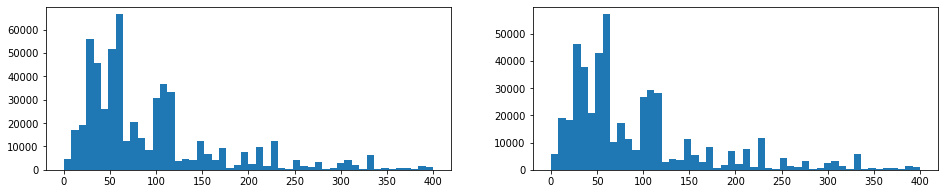

In [189]:
#compare transaction amounts between train and test
print(all_data_train[["TransactionAmt"]].describe().merge(all_data_test[["TransactionAmt"]].describe(), how = "left", left_index = True, right_index = True))

#test with different boundaries
plt.figure(figsize=(16, 3))
plt.subplot(121)
plt.hist(all_data_train["TransactionAmt"].loc[all_data_train['TransactionAmt'] <= 400],50);
plt.subplot(122)
plt.hist(all_data_test["TransactionAmt"].loc[all_data_test['TransactionAmt'] <= 400],50);

#plt.axis([0, 1000, 0, 600000])
plt.show()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64
W    360987
C     69266
R     35647
H     29373
S     11418
Name: ProductCD, dtype: int64


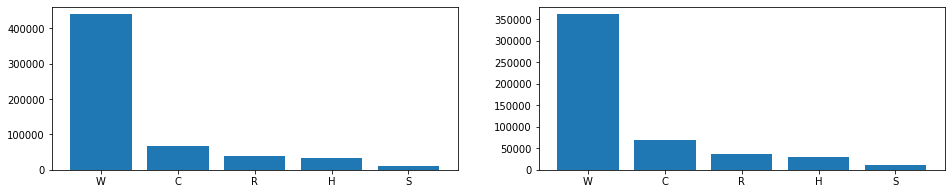

In [199]:
bar_train_product = all_data_train["ProductCD"].value_counts()
bar_test_product = all_data_test["ProductCD"].value_counts()
print(bar_train_product)
print(bar_test_product)

plt.figure(figsize=(16, 3))
plt.subplot(121)
plt.bar(bar_train_product.index, bar_train_product.values)
plt.subplot(122)
plt.bar(bar_test_product.index, bar_test_product.values)
plt.show()

**Things to check out:**
- Per product fraud rate
- Feature to define the stamp
- Understand TransactionDT
- Per Device fraud rate
- Cross tab of per product
- Time series of product (maybe some products are depricated already)
- Check differences btw train and test
- Compare train and test ranges / values of features
- bin transaction amount and compare it btw train and test
- id_09 is standartised - reverse it???
- id_13 - could it be age??

Potential features:
- row index
- ...